# Computers in Biology & Medicine

> A robust and generalized framework in diabetes classification across heterogeneous environments.
> A paper by Hejia Zhou, Saifur rahman, Maia Angelova, Clinton R. Bruce, Chandan Karmakar

This repository consists of code implementing a part of aforementioned paper.

In [19]:
# Data Loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import calculate_nutritional_status

df = pd.read_csv('data/diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
from utils import calculate_empty_data_in_a_feature

# Calculate the number of zeros in SkinThickness
percent_zero_table = {}
features_to_calculate_missing_percentage = df.drop('Outcome',axis=1)
for column in features_to_calculate_missing_percentage:
    percent_zero_table[column] = calculate_empty_data_in_a_feature(column,features_to_calculate_missing_percentage)
print("Table 2: \nThe percentage of missing values for each feature in PIMA dataset")
percent_zero_table

Table 2: 
The percentage of missing values for each feature in PIMA dataset


{'Pregnancies': 14.5,
 'Glucose': 0.7,
 'BloodPressure': 4.6,
 'SkinThickness': 29.6,
 'Insulin': 48.7,
 'BMI': 1.4,
 'DiabetesPedigreeFunction': 0.0,
 'Age': 0.0}

In [31]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [32]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
from utils import check_column_types

check_column_types(df)

{'Pregnancies': 'discrete',
 'Glucose': 'continuous',
 'BloodPressure': 'continuous',
 'SkinThickness': 'continuous',
 'Insulin': 'continuous',
 'BMI': 'continuous',
 'DiabetesPedigreeFunction': 'continuous',
 'Age': 'continuous',
 'Outcome': 'discrete'}

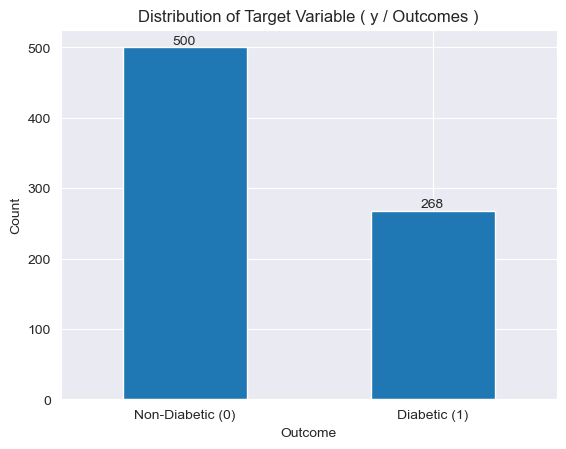

In [34]:
# Create a bar plot for the 'Outcome' variable
ax = df['Outcome'].value_counts().plot(kind='bar')

# Add axis labels and title
ax.set_xlabel('Outcome')
ax.set_ylabel('Count')
ax.set_title('Distribution of Target Variable ( y / Outcomes )')

# Customize x-axis tick labels for clarity
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Diabetic (0)', 'Diabetic (1)'], rotation=0)

for i, count in enumerate(df['Outcome'].value_counts()):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

#### Column Data

In [35]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

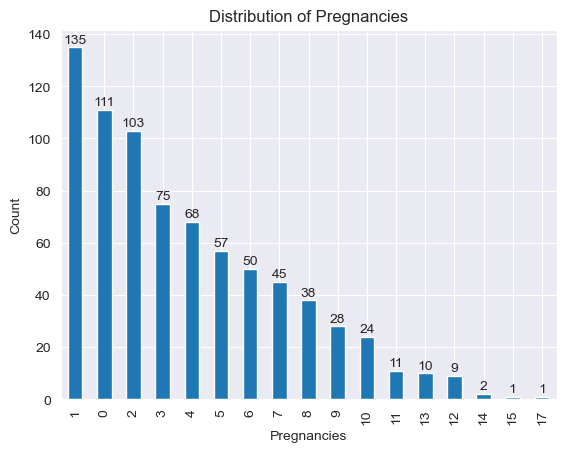

In [36]:

ax = df['Pregnancies'].value_counts().plot(kind='bar', xlabel='Pregnancies', ylabel='Count',
                                      title='Distribution of Pregnancies')

for i, count in enumerate(df['Pregnancies'].value_counts()):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')
#
# # Display the plot
# plt.show()

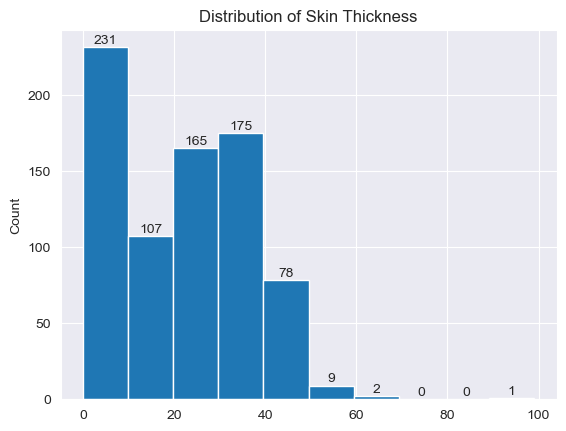

In [37]:
ax = df['SkinThickness'].plot(kind='hist', ylabel='Count',bins=10, title='Distribution of Skin Thickness')
# Get the heights and positions of the histogram bars
for patch in ax.patches:
    height = patch.get_height()  # Height of the bar (count)
    x = patch.get_x() + patch.get_width() / 2  # Center of the bar
    ax.text(x, height + 0.5, int(height), ha='center', va='bottom')

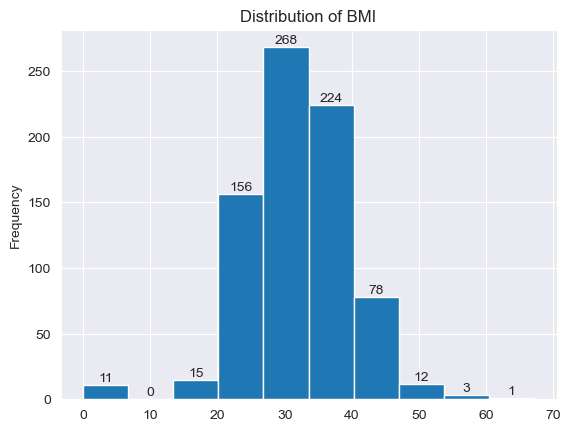

In [38]:
ax = df['BMI'].plot(kind='hist', bins=10, title='Distribution of BMI')
# Get the heights and positions of the histogram bars
for patch in ax.patches:
    height = patch.get_height()  # Height of the bar (count)
    x = patch.get_x() + patch.get_width() / 2  # Center of the bar
    ax.text(x, height + 0.5, int(height), ha='center', va='bottom')

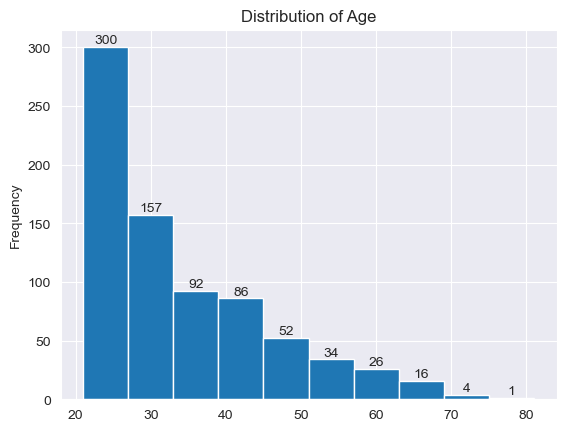

In [39]:
# Create the histogram
ax = df['Age'].plot(kind='hist', bins=10, title='Distribution of Age')

# Get the heights and positions of the histogram bars
for patch in ax.patches:
    height = patch.get_height()  # Height of the bar (count)
    x = patch.get_x() + patch.get_width() / 2  # Center of the bar
    ax.text(x, height + 0.5, int(height), ha='center', va='bottom')

plt.show()

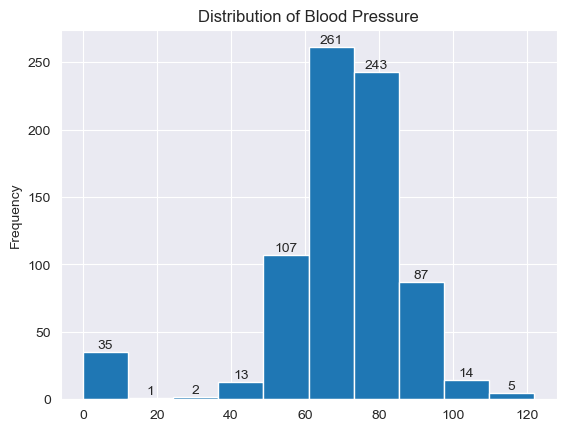

In [40]:
ax = df['BloodPressure'].plot(kind='hist', title='Distribution of Blood Pressure', bins=10)
# Get the heights and positions of the histogram bars
for patch in ax.patches:
    height = patch.get_height()  # Height of the bar (count)
    x = patch.get_x() + patch.get_width() / 2  # Center of the bar
    ax.text(x, height + 0.5, int(height), ha='center', va='bottom')

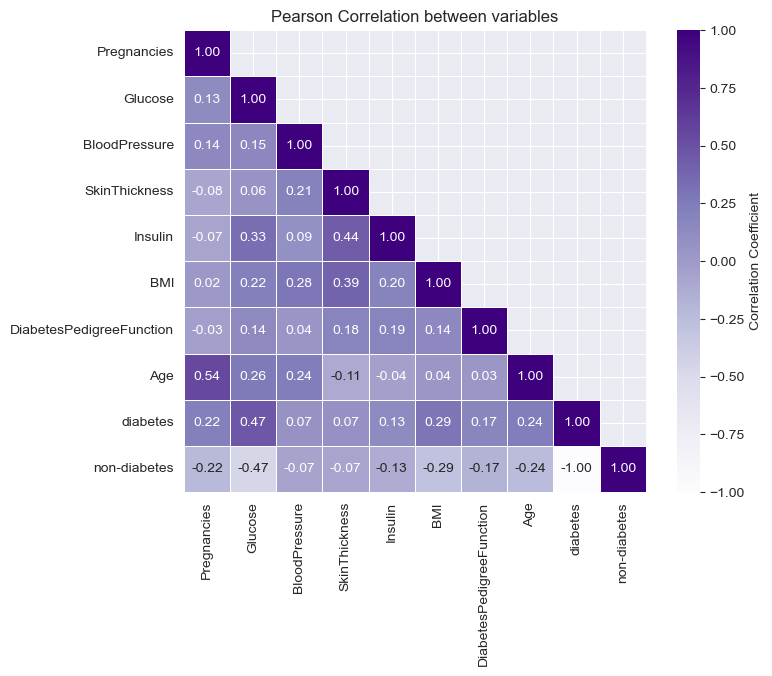

In [28]:

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the 'Outcome' column
# Step 1: Create dummy variables for 'Outcome'
heatmap_df = pd.read_csv('data/diabetes.csv')
heatmap_df['diabetes'] = heatmap_df['Outcome'].apply(lambda x: 1 if x == 1 else 0)
heatmap_df['non-diabetes'] = heatmap_df['Outcome'].apply(lambda x: 1 if x == 0 else 0)
heatmap_df.drop(['Outcome'],axis=1,inplace=True)
# Data Cleaning
# heatmap_df = heatmap_df[(heatmap_df['Glucose'] != 0) & (heatmap_df['BloodPressure'] != 0) & (heatmap_df['BMI'] != 0)]
# scaler = StandardScaler()
# heatmap_df = scaler.fit_transform(heatmap_df.drop(['Outcome'],axis=1),heatmap_df['Outcome'])

# heatmap_df.drop('Outcome',axis=1,inplace=True)

# Step 2: Compute the correlation matrix
corr_matrix = heatmap_df.corr()

# Step 3: Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool),k=1.0)

# Step 4: Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Step 5: Draw the heatmap with the mask (lower triangle only)
sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,  # Show correlation values
            cmap='Purples',  # Color scheme
            fmt='.2f', # Limit to 2 decimal places
            vmin=-1, vmax=1,  # Range for correlation values
            center=0,  # Center point of colormap
            square=True,  # Make cells square
            linewidths=0.5,  # Lines between cells
            cbar_kws={'label': 'Correlation Coefficient'})  # Colorbar label

# Step 6: Add title
plt.title('Pearson Correlation between variables')

# Step 7: Show the plot
plt.show()

# Adding New Columns --

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0

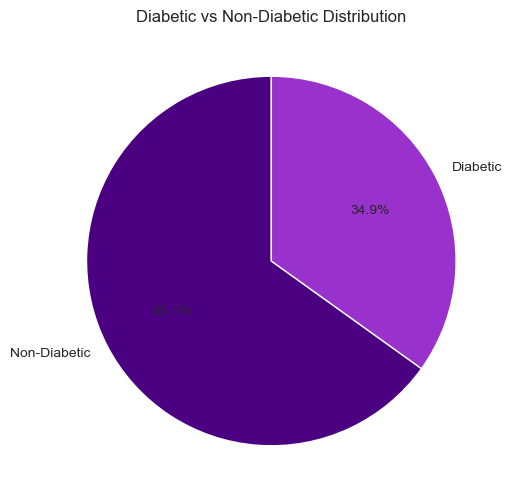

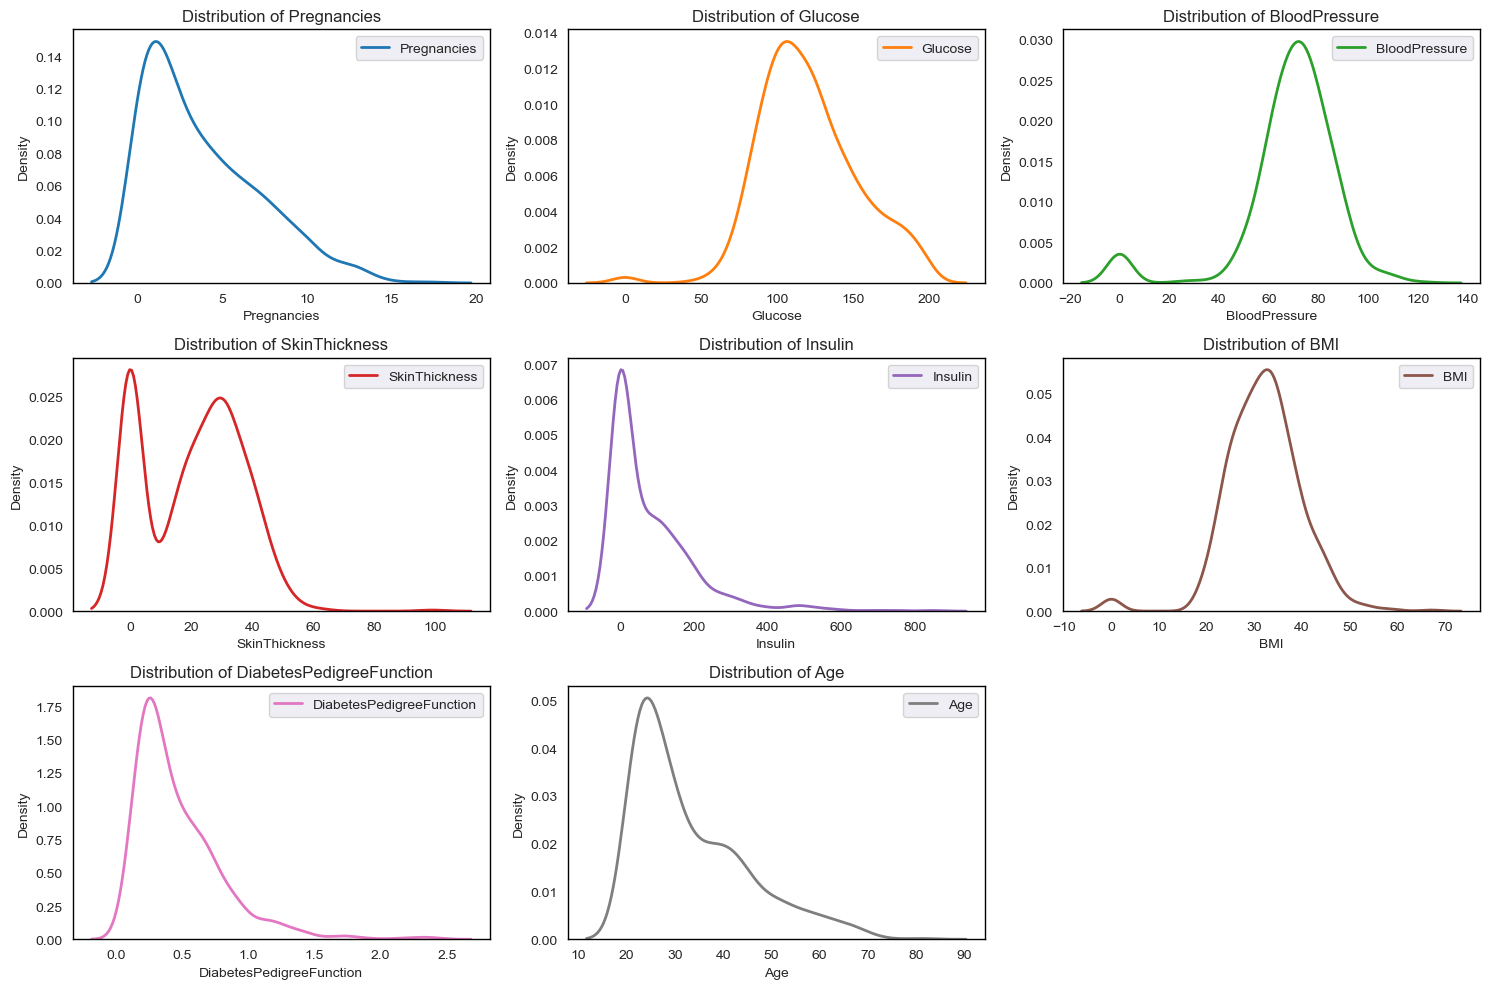

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the PIMA dataset
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = df

# Basic data exploration
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())
print("\nSummary Statistics:")
print(data.describe())
#['#4B0082', '#6A0DAD', '#8A2BE2', '#9932CC', '#BA55D3']
# Visualization 1: Pie Chart for Diabetic vs Non-Diabetic
plt.figure(figsize=(8, 6))
colors = ['#4B0082', '#9932CC']  # Good colors: green for non-diabetic, orange for diabetic
labels = ['Non-Diabetic', 'Diabetic']
counts = data['Outcome'].value_counts()
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Diabetic vs Non-Diabetic Distribution')
ax = plt.gca()
ax.set_facecolor('none')
plt.gcf().set_facecolor('none')
plt.show()
plt.close()

# Visualization 2: Line Charts (KDE) for Feature Distribution
plt.figure(figsize=(15, 10))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']  # Distinct colors
for i, column in enumerate(data.columns[:-1], 1):  # Exclude Outcome
    plt.subplot(3, 3, i)
    sns.kdeplot(data[column], color=colors[i-1], linewidth=2, label=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    ax = plt.gca()
    ax.set_facecolor('none')
    ax.grid(False)  # Remove gridlines
    ax.legend(loc='upper right')  # Add legend inside subplot
    for spine in ax.spines.values():  # Add border
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1)
    plt.gcf().set_facecolor('none')
plt.tight_layout()
plt.show()
plt.close()

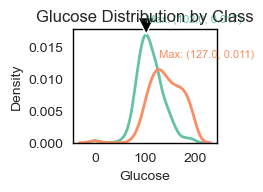

In [18]:
from seaborn.external.kde import gaussian_kde

# Visualization 3: Class Density Line Chart with Maxima Labels
plt.subplot(3, 3, 9)
non_diabetic = data[data['Outcome'] == 0]['Glucose'].dropna()
diabetic = data[data['Outcome'] == 1]['Glucose'].dropna()

# Plot KDE for Non-Diabetic
kde_non = gaussian_kde(non_diabetic)
x_non = np.linspace(min(non_diabetic), max(non_diabetic), 200)
y_non = kde_non(x_non)
sns.kdeplot(non_diabetic, color='#66c2a5', label='Non-Diabetic', linewidth=2)
max_idx_non = np.argmax(y_non)
max_x_non = x_non[max_idx_non]
max_y_non = y_non[max_idx_non]
plt.annotate(f'Max: ({max_x_non:.1f}, {max_y_non:.3f})', xy=(max_x_non, max_y_non),
             xytext=(max_x_non, max_y_non + 0.002), arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=8, color='#66c2a5')

# Plot KDE for Diabetic
kde_diab = gaussian_kde(diabetic)
x_diab = np.linspace(min(diabetic), max(diabetic), 200)
y_diab = kde_diab(x_diab)
sns.kdeplot(diabetic, color='#fc8d62', label='Diabetic', linewidth=2)
max_idx_diab = np.argmax(y_diab)
max_x_diab = x_diab[max_idx_diab]
max_y_diab = y_diab[max_idx_diab]
plt.annotate(f'Max: ({max_x_diab:.1f}, {max_y_diab:.3f})', xy=(max_x_diab, max_y_diab),
             xytext=(max_x_diab, max_y_diab + 0.002),
             fontsize=8, color='#fc8d62')

plt.title('Glucose Distribution by Class')
plt.xlabel('Glucose')
plt.ylabel('Density')
ax = plt.gca()
ax.set_facecolor('none')
ax.grid(False)
# ax.legend(loc='upper right')
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)
plt.gcf().set_facecolor('none')
plt.tight_layout()
plt.show()
plt.close()